In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img


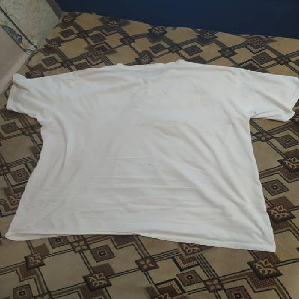

In [6]:
path = '/Users/mingjieyang/Desktop/Projects/ml/machine-learning/clothing-dataset-small/train/t-shirt'
name = '0a85a584-cb49-4795-b2f1-7eebbf09399a.jpg'
fullname = f'{path}/{name}'
load_img(fullname, target_size=(299, 299))


In [17]:
img = load_img(fullname, target_size=(299, 299))
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x288587730>


In [18]:
x = np.array(img)
x.shape

(299, 299, 3)

In [19]:
x

array([[[ 99,  99,  87],
        [116, 116, 104],
        [114, 114, 102],
        ...,
        [ 23,  30,  46],
        [ 23,  30,  46],
        [ 22,  29,  45]],

       [[106, 106,  94],
        [120, 120, 108],
        [122, 122, 110],
        ...,
        [ 24,  31,  47],
        [ 23,  30,  46],
        [ 23,  30,  46]],

       [[118, 118, 106],
        [125, 125, 113],
        [130, 130, 118],
        ...,
        [ 25,  32,  48],
        [ 24,  31,  47],
        [ 24,  31,  47]],

       ...,

       [[ 79,  72,  53],
        [ 82,  75,  57],
        [ 84,  77,  59],
        ...,
        [129, 118,  88],
        [128, 116,  90],
        [127, 115,  93]],

       [[ 86,  79,  60],
        [ 85,  78,  60],
        [ 83,  76,  58],
        ...,
        [129, 118,  88],
        [128, 116,  90],
        [127, 114,  95]],

       [[ 76,  69,  50],
        [ 69,  62,  44],
        [ 64,  57,  39],
        ...,
        [129, 118,  88],
        [128, 116,  90],
        [127, 114,  95]]

In [3]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [14]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

2023-11-06 22:42:55.720365: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2023-11-06 22:42:55.720400: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-06 22:42:55.720417: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-06 22:42:55.720497: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-06 22:42:55.720550: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


91884032/91884032 [==============================] - 13s 0us/step


In [20]:
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [23]:
X = preprocess_input(X)

In [25]:
pred = model.predict(X)

1/1 [==============================] - 0s 32ms/step


In [28]:
decode_predictions(pred)

35363/35363 [==============================] - 0s 1us/step


[[('n03595614', 'jersey', 0.9524979),
  ('n04370456', 'sweatshirt', 0.00978866),
  ('n04033995', 'quilt', 0.0031949696),
  ('n03710637', 'maillot', 0.0012328869),
  ('n03188531', 'diaper', 0.0011855038)]]

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
path = '/Users/mingjieyang/Desktop/Projects/ml/machine-learning/clothing-dataset-small/train'

In [9]:
# Build image generator for training (takes preprocessing input function)
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Load in train dataset into train generator
train_ds = train_gen.flow_from_directory(directory=path, # Train images directory
                                         target_size=(150,150), # resize images to train faster
                                         batch_size=32) # 32 images per batch


Found 3068 images belonging to 10 classes.


In [10]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [11]:
X, y = next(train_ds)

In [13]:
y[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
# Create image generator for validation
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Load in image for validation
val_ds = val_gen.flow_from_directory(directory=path/to/val_imgs_dir, # Validation image directory
                                     target_size=(150,150),
                                     batch_size=32,
                                     shuffle=False) # False for validation